In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


FIND OUT ABOUT MISSING VALUES

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: >

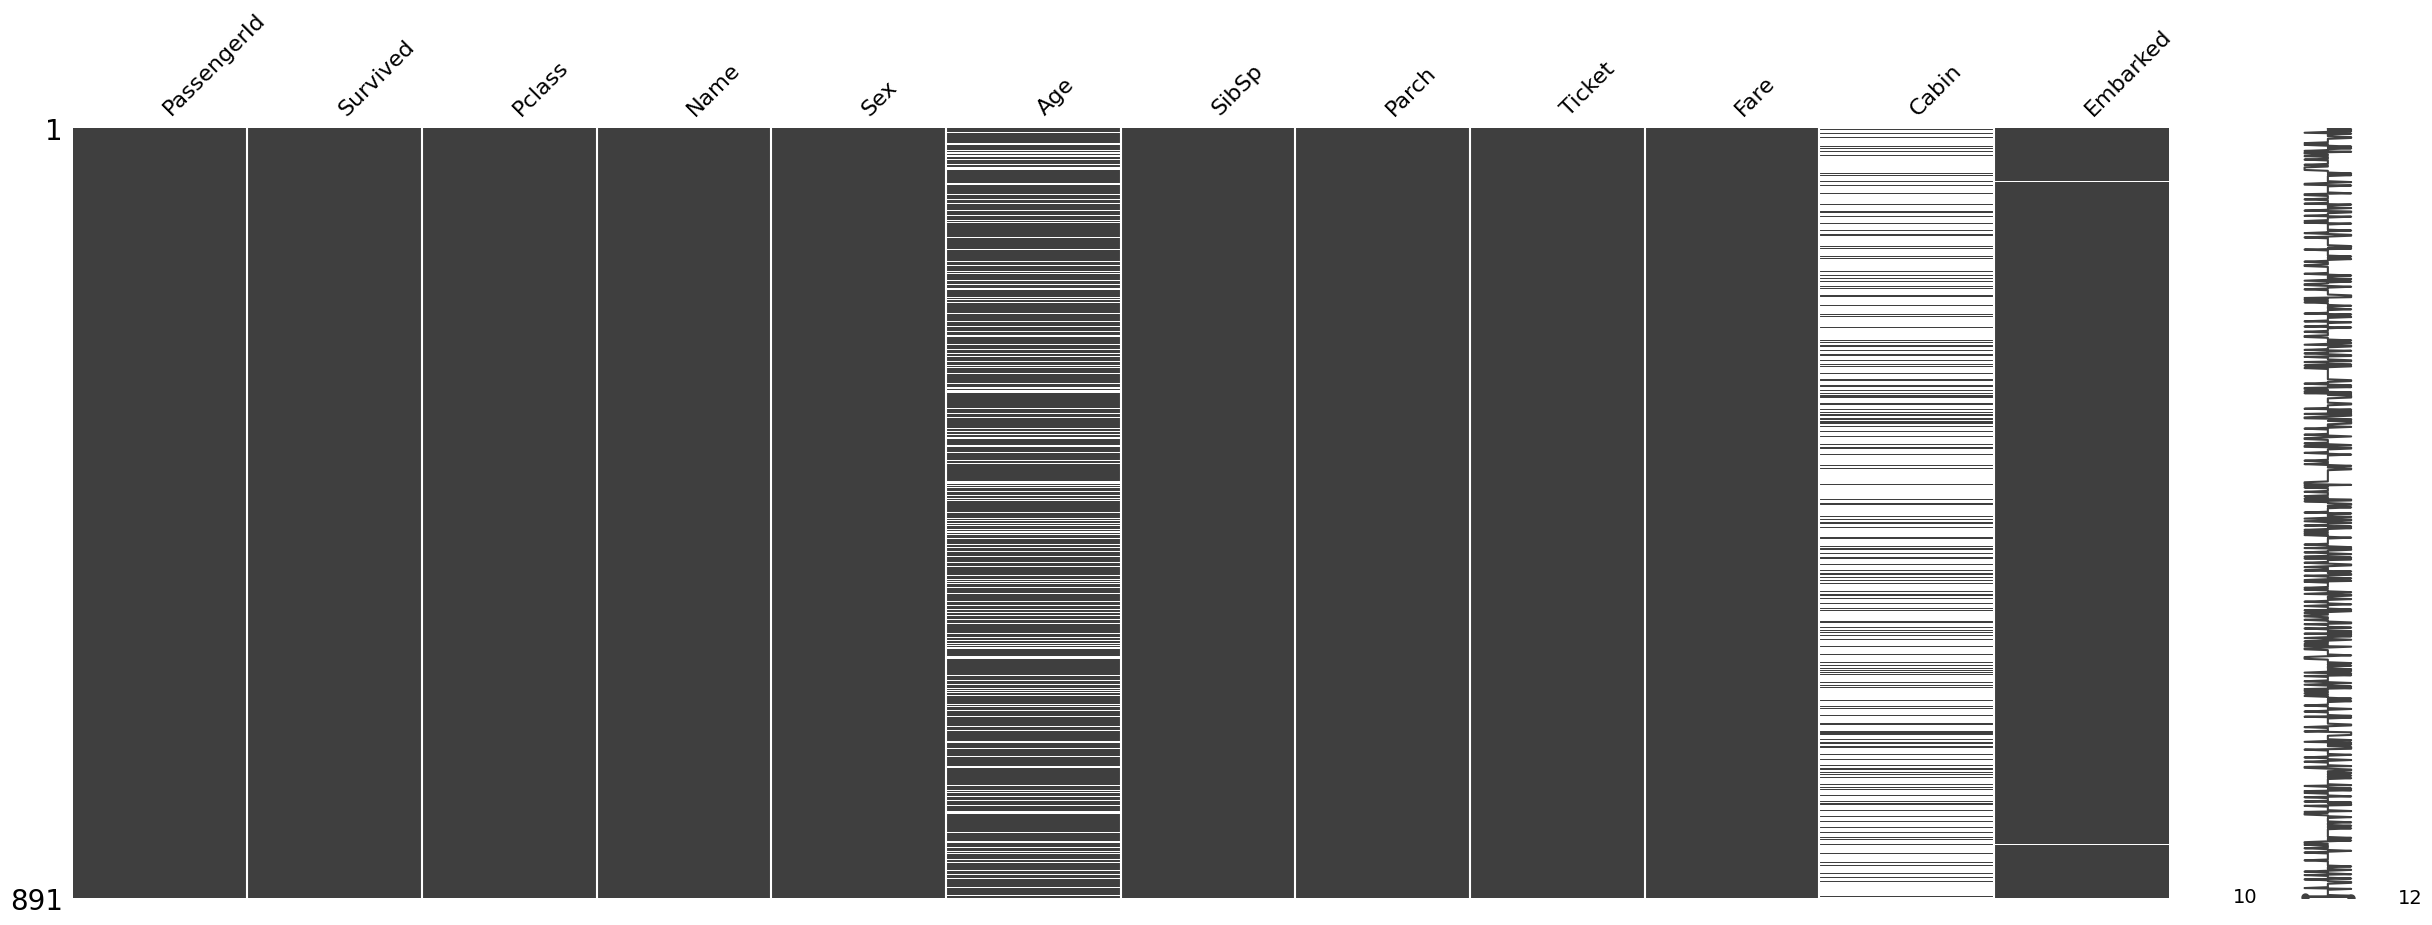

In [4]:
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

missingno.matrix(train_df, figsize=(30, 10))

<AxesSubplot: >

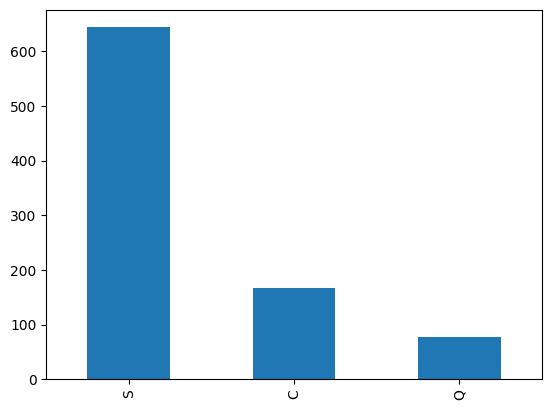

In [5]:
train_df.Embarked.value_counts().plot(kind="bar")

In [6]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

<AxesSubplot: >

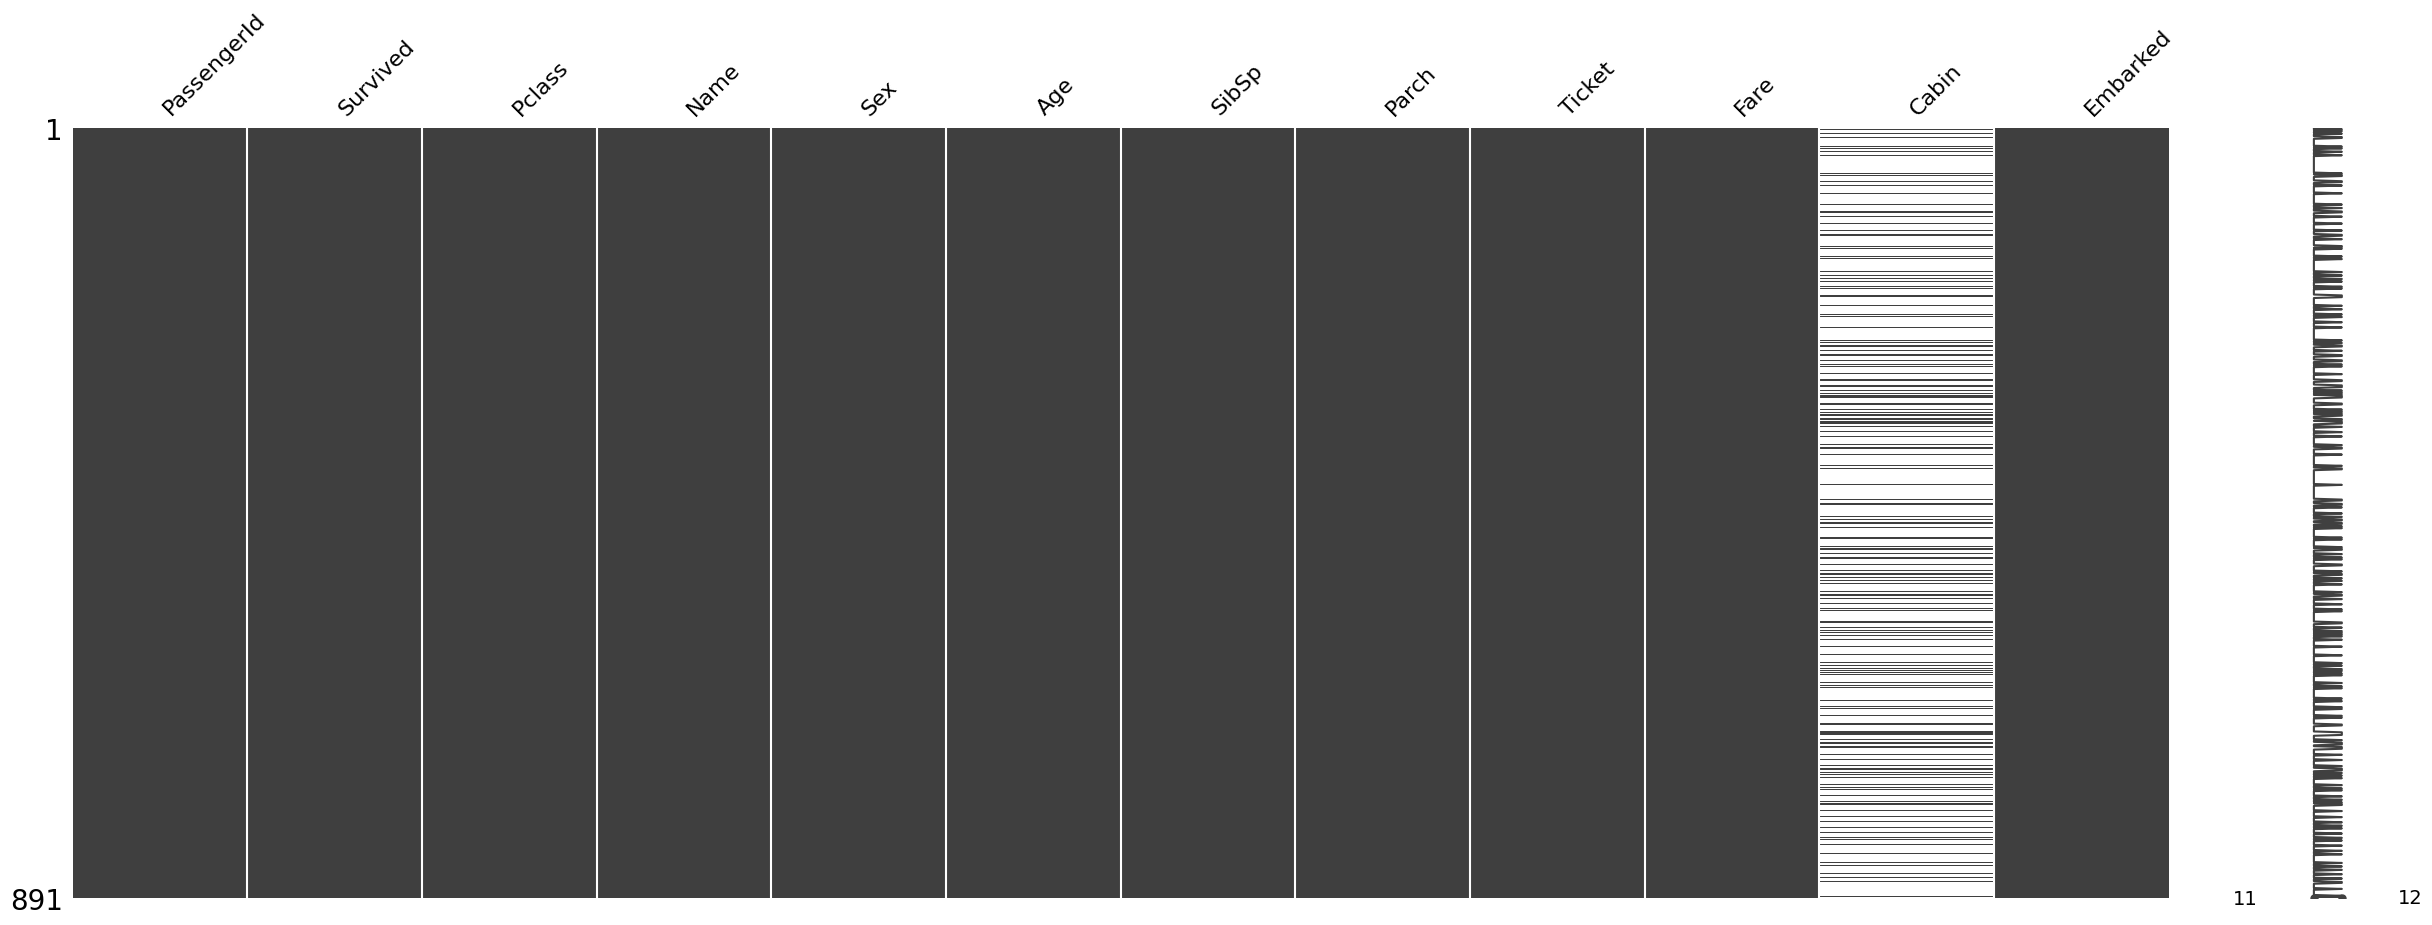

In [7]:
missingno.matrix(train_df,figsize=(30,10))

EXPLORING relationships

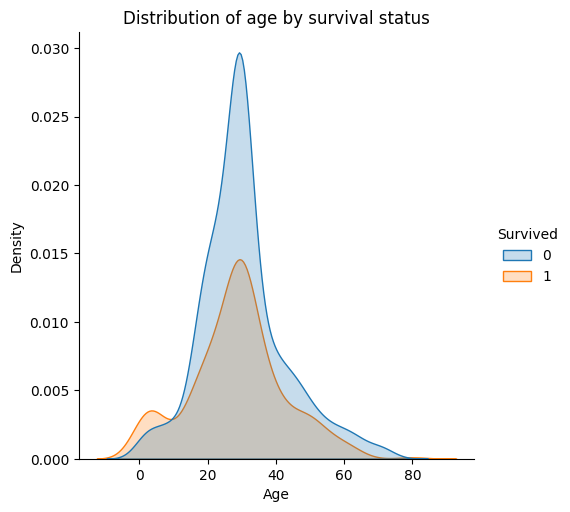

In [8]:
sns.displot(data=train_df, x="Age", hue="Survived", kind="kde", fill=True)
plt.title("Distribution of age by survival status")
plt.show()

Relation between gender and survived

<AxesSubplot: xlabel='Survived', ylabel='count'>

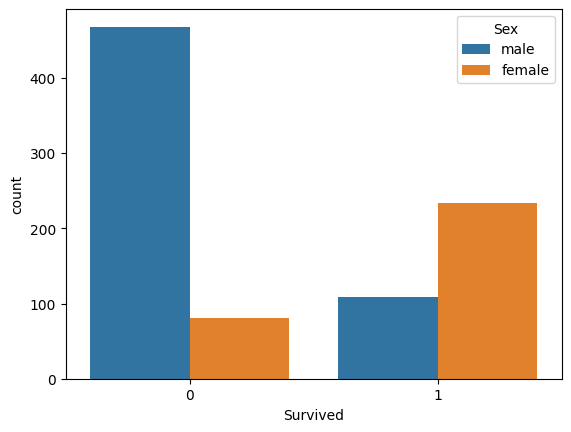

In [9]:
sns.countplot(data=train_df,x='Survived',hue='Sex')

Relation between pclass and survived

<AxesSubplot: xlabel='Survived', ylabel='count'>

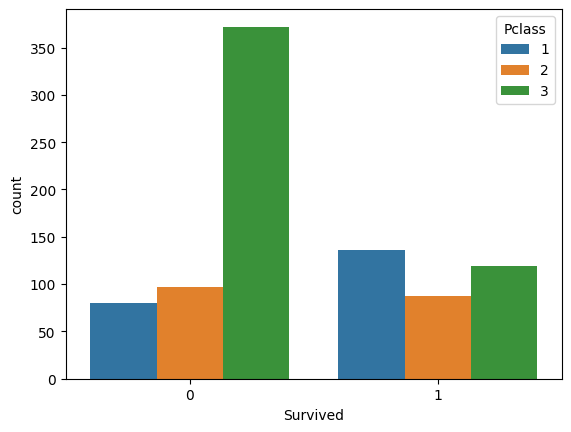

In [10]:
sns.countplot(data=train_df,x='Survived',hue='Pclass')

relation between survived and embarked

<AxesSubplot: xlabel='Survived', ylabel='count'>

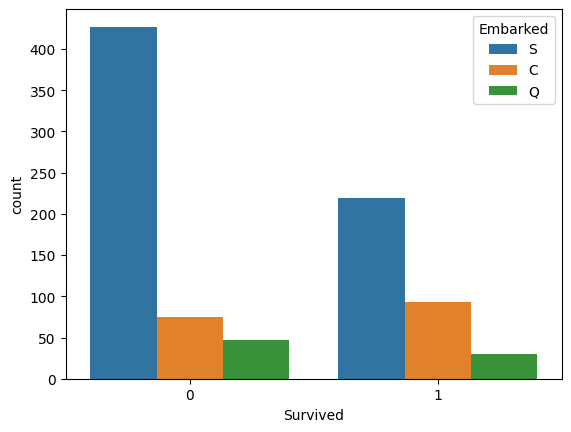

In [11]:
sns.countplot(data=train_df,x='Survived',hue='Embarked')

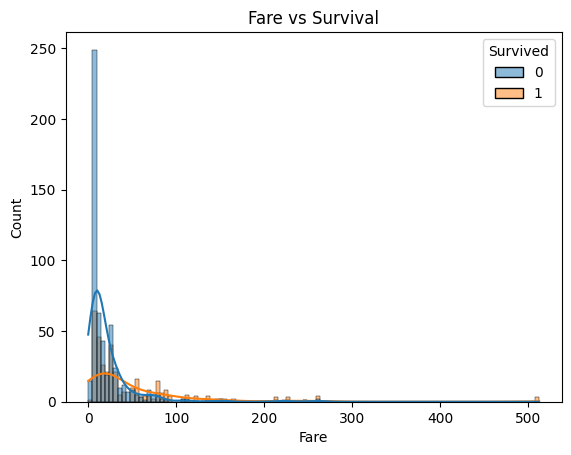

In [12]:
sns.histplot(data=train_df, x="Fare", hue="Survived", kde=True)
plt.title("Fare vs Survival")
plt.show()

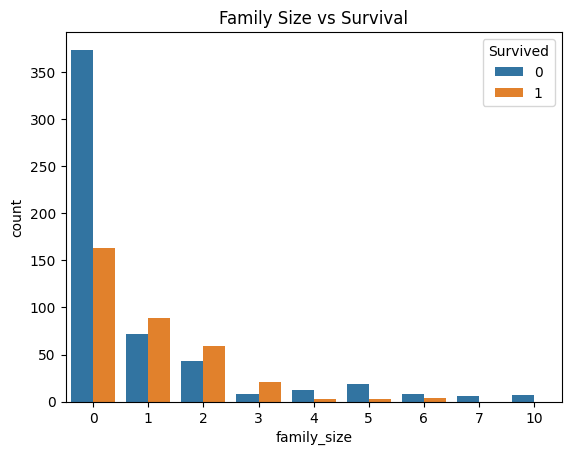

In [13]:
train_df["family_size"] = train_df["SibSp"] + train_df["Parch"]
sns.countplot(data=train_df, x="family_size", hue="Survived")
plt.title("Family Size vs Survival")
plt.show()

Data Preparation

In [14]:
NUMERICAL_COLUMNS = ["Age", "SibSp", "Parch", "Fare"]
CATEGORICAL_COLUMNS = ["Pclass", "Sex", "Embarked"]
TARGET_COLUMN = "Survived"
COLUMNS_TO_DROP = ["Name", "Ticket", "Cabin"]

TRAIN_COLUMNS_TO_DROP = COLUMNS_TO_DROP + [TARGET_COLUMN]

In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# scaling numerical data
for numerical_col in NUMERICAL_COLUMNS:
    scaler = StandardScaler()

    train_df[numerical_col] = scaler.fit_transform(train_df[numerical_col].values.reshape(-1, 1))

# label data encoding with LabelEncoder
for cat_col in CATEGORICAL_COLUMNS:
    le = LabelEncoder()

    train_df[cat_col] = le.fit_transform(train_df[cat_col])

# create X and y sets from train dataframe
X = train_df.drop(columns=TRAIN_COLUMNS_TO_DROP)
y = train_df[TARGET_COLUMN]

# see the data
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,1,2,1,-0.592481,0.432793,-0.473674,-0.502445,2,1
1,2,0,0,0.638789,0.432793,-0.473674,0.786845,0,1
2,3,2,0,-0.284663,-0.474545,-0.473674,-0.488854,2,0
3,4,0,0,0.407926,0.432793,-0.473674,0.420730,2,1
4,5,2,1,0.407926,-0.474545,-0.473674,-0.486337,2,0


MUTUAL INFORMATION

In [16]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y):
    mi_scores=mutual_info_regression(X,y)
    mi_scores=pd.Series(mi_scores,name='MI scores',index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X,y)
mi_scores

Sex            0.162211
Fare           0.137761
Pclass         0.074144
family_size    0.058858
Embarked       0.017632
PassengerId    0.016227
Age            0.000000
SibSp          0.000000
Parch          0.000000
Name: MI scores, dtype: float64

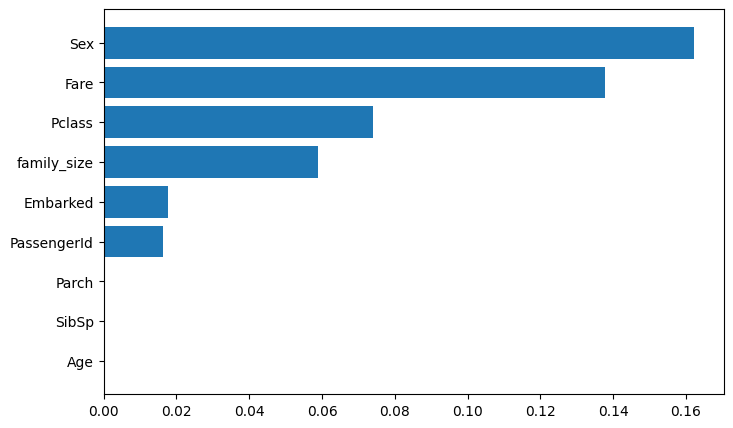

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

In [18]:
# create validation set
from sklearn.model_selection import train_test_split

X_train,X_validate,y_train,y_validate = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel='linear'),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier": RandomForestClassifier(),
}

scores = {}
cross_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validate)
    scores[model_name] = accuracy_score(y_validate, y_pred)
    
best_model_it = max(scores, key=scores.get)
best_model_it

'RandomForestClassifier'

Confusion Matrix

<AxesSubplot: >

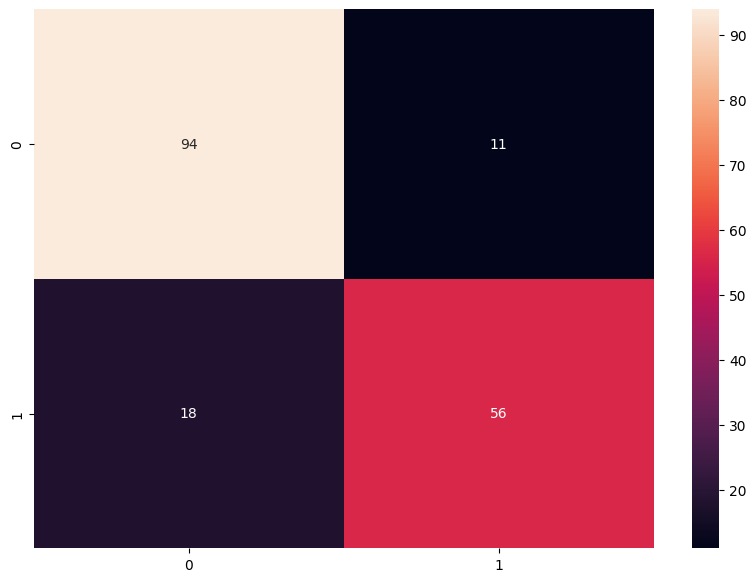

In [20]:
from sklearn.metrics import confusion_matrix
best_model = models[best_model_it]
values = best_model.predict(X_validate)

cm = confusion_matrix(y_validate,values)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)

In [21]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:

for numerical_col in NUMERICAL_COLUMNS:
    scaler = StandardScaler()

    test_df[numerical_col] = scaler.fit_transform(test_df[numerical_col].values.reshape(-1, 1))

for cat_col in CATEGORICAL_COLUMNS:
    le = LabelEncoder()

    test_df[cat_col] = le.fit_transform(test_df[cat_col])

test_df = test_df.drop_duplicates().dropna()
test_df['family_size'] = test_df['SibSp'] + test_df['Parch']

X_test = test_df.drop(columns=COLUMNS_TO_DROP)

best_model = models[best_model_it]
values = best_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.index, 'Survived': values})

output.head()

,PassengerId,Survived
0,12,1
1,14,1
2,24,1
3,26,1
4,28,1


In [23]:
PATH_TO_SAVE = "submission.csv"

output.to_csv(PATH_TO_SAVE, index=False)